In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [55]:
y_train_onehot = pd.get_dummies(pd.DataFrame({"digit": y_train}), columns = ["digit"]).values
y_test_onehot = pd.get_dummies(pd.DataFrame({"digit": y_test}), columns = ["digit"]).values

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

In [35]:
print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=255, X_train.min()=0


# Normalize data

$$X' = \frac{X}{X_{max}}$$

In [36]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=1.0, X_train.min()=0.0


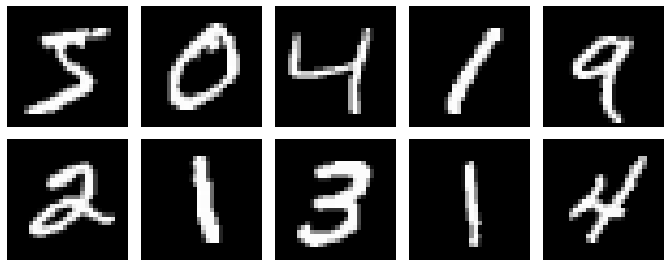

In [37]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace = 0, hspace = .1, bottom = 0)

display_images(X_train)

## MLP

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "mlp_model")
    model.add(Flatten(input_shape = (28, 28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    
        
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

#model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations = ["softmax"])

#model_1.summary()

In [39]:
#model_1.fit(X_train, y_train, validation_split = 1/6, epochs = 20, verbose = 1)

In [40]:
#metrics = pd.DataFrame(model_1.history.history)

#metrics.index = range(len(metrics))

#metrics.head()

In [41]:
def plot_metrics(df_history, style = "-o"):
    _, axes = plt.subplots(1, 2, figsize = (12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y = col, xlabel = "Epochs", ylabel = col[0], ax = ax, style = style)

        ax.grid()

#plot_metrics(metrics)

## Hidden layers

In [42]:
model_2 = MLP_model(nodes = [128, 128, 10], activations = ["relu", "relu", "softmax"], names = ["hidden1", "hidden2", "output"])

model_2.summary()

Model: "mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_2.fit(X_train, y_train, validation_split = 1/6, epochs = 3, verbose = 1)

Epoch 1/3
  20/1563 [..............................] - ETA: 8s - loss: 1.7893 - accuracy: 0.4766 

2022-04-27 00:03:52.586379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1560/1563 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.9251

2022-04-27 00:04:00.541351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 9s 6ms/step - loss: 0.2506 - accuracy: 0.9252 - val_loss: 0.1326 - val_accuracy: 0.9603
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1059 - accuracy: 0.9676 - val_loss: 0.0913 - val_accuracy: 0.9723
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0720 - accuracy: 0.9772 - val_loss: 0.0949 - val_accuracy: 0.9725


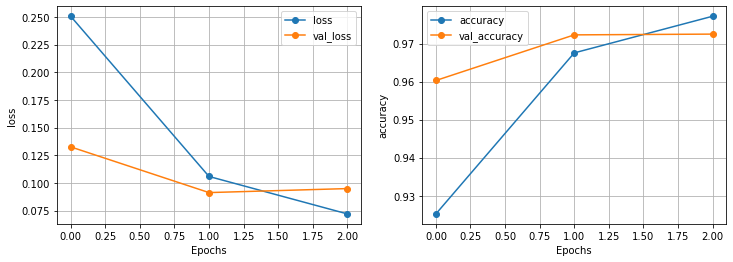

In [44]:
metrics = pd.DataFrame(model_2.history.history)

metrics.index = range(len(metrics))

plot_metrics(metrics)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)
y_pred[0]


2022-04-27 00:04:19.351225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([1.4109092e-06, 1.6651335e-05, 6.2755559e-04, 2.5983539e-03,
       1.3117721e-08, 1.9150741e-06, 3.8731720e-09, 9.9671149e-01,
       1.4021045e-05, 2.8581917e-05], dtype=float32)

In [46]:
y_pred = np.argmax(y_pred, axis = 1)

#print(classification_report(y_test, y_pred))
#cm = confusion_matrix(y_test, y_pred)
#ConfusionMatrixDisplay(cm).plot()

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

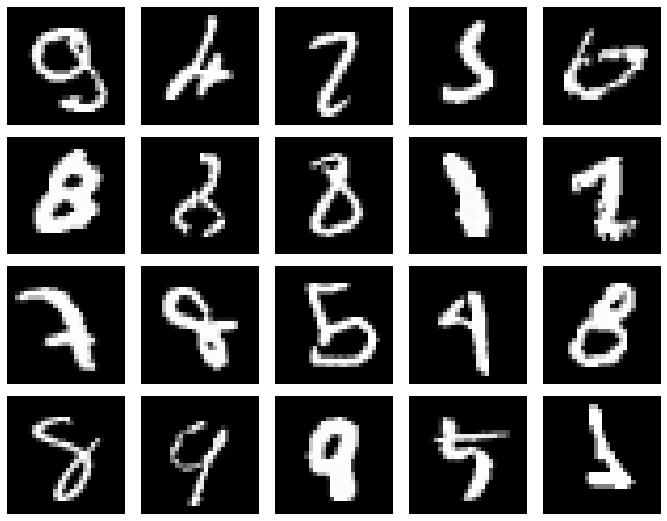

In [50]:

# a few misclassifications
display_images(misclassified_samples, 4,5, (12,8))

In [184]:
import math

class EvoClassifier:
    def __init__(self, n = 100, hidden_layers = False, activation = "sigmoid", random_state = None):

        self.n = n // 2 * 2
        self.nets = []
        self.best_net = -1
        self.best_result = None
        self.validation_loss_history = []
        self.training_loss_history = []
        self.mutation_sigma = 0

        if activation == "sigmoid":
            self.activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif activation == "relu":
            self.activation_function = lambda x: np.maximum(0, x)
        elif activation == "leaky_relu":
            self.activation_function = lambda x: np.maximum(0.1 * x, x)

        self.output_activation_function = lambda x: 1 / (1 + np.exp(-x))
        
        if hidden_layers:
            self.layers = hidden_layers + [10]
        else:
            self.layers = [10]
        
        if random_state != None:
            np.random.seed(random_state)

    
    def fit(self, X_train, y_train, epochs = 100, validation_data = False, verbose = 0):
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]

        if validation_data:
            X_val, y_val = validation_data
        
        self.layers = [X_train.shape[1]] + self.layers

        for i in range(self.n):
            self.nets += [[]]
            for j in range(len(self.layers) - 1):
                self.nets[i] += [np.random.uniform(-3, 3, (self.layers[j], self.layers[j + 1]))]

        self.y_preds = np.zeros((100, 60000, 10))

        self.nets_loss = np.zeros(len(self.nets))
        self.sorted_indecies = np.zeros(len(self.nets))

        for epoch in range(epochs):
            for i in range(len(self.nets)):
                forward_pass = X_train.T

                for j in range(0, len(self.layers) - 2):
                    forward_pass = self.activation_function(self.nets[i][j].T @ forward_pass)

                forward_pass = self.nets[i][-1].T @ forward_pass
                forward_pass = self.output_activation_function(forward_pass)
                
                self.y_preds[i] = forward_pass.T
            
            self.nets_loss = np.mean(np.abs(self.y_preds - y_train), axis = 2)
            
            self.sorted_indecies = np.argsort(self.nets_loss.mean(axis = 1))
            
            self.mutation_sigma = 0.1 + 2 * 1 / math.exp(epoch / (epochs / (10 * math.log10(epochs + 1))))
            
            for i in range(0, self.n // 2, 2):
                for j in range(len(self.layers) - 1):
                    self.nets[self.sorted_indecies[self.n // 2 + i]][j] = (self.nets[self.sorted_indecies[i]][j] + self.nets[self.sorted_indecies[1 + i]][j]) / 2 + np.random.normal(0, self.mutation_sigma, (self.layers[j], self.layers[j + 1]))
                    self.nets[self.sorted_indecies[self.n // 2 + 1 + i]][j] = (self.nets[self.sorted_indecies[i]][j] + self.nets[self.sorted_indecies[1 + i]][j]) / 2 + np.random.normal(0, self.mutation_sigma, (self.layers[j], self.layers[j + 1]))

            if self.best_net != self.sorted_indecies[0]:
                self.best_net = self.sorted_indecies[0]
                self.training_loss_history += [self.nets_loss[self.best_net]]

                if validation_data:
                    self.validation_loss_history += [np.mean(np.abs(y_val - self.predict(X_val)))]
                    if verbose == 1:
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - val_loss: {self.validation_loss_history[-1]}")
                else:
                    if verbose == 1:
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1].mean()}")


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        forward_pass = X.T
        for j in range(0, len(self.layers) - 2):
            forward_pass = self.activation_function(self.nets[self.best_net][j].T @ forward_pass)

        forward_pass = self.output_activation_function(self.nets[self.best_net][-1].T @ forward_pass)


        return forward_pass.T

In [186]:
classifier = EvoClassifier(n = 100, hidden_layers = [64], activation = "relu", random_state = 42)
classifier.fit(X_train.reshape(-1, 28 * 28), y_train_onehot, epochs = 1000, verbose = 1)

/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_1401/2165102959.py:21: RuntimeWarning: overflow encountered in exp
  self.output_activation_function = lambda x: 1 / (1 + np.exp(-x))


Epoch 0 - loss: 0.29421671368928914
Epoch 1 - loss: 0.2635065011295324
Epoch 5 - loss: 0.2577162782374886
Epoch 6 - loss: 0.2318312351032709
Epoch 7 - loss: 0.19927911788935723
Epoch 9 - loss: 0.1819242212080481
Epoch 10 - loss: 0.1778789383050943
Epoch 11 - loss: 0.170292617116794
Epoch 12 - loss: 0.16098163439461666
Epoch 13 - loss: 0.1432018262963709
Epoch 14 - loss: 0.1372708740126222
Epoch 15 - loss: 0.1296998675440943
Epoch 16 - loss: 0.12497968889155864
Epoch 17 - loss: 0.1130190992467419
Epoch 18 - loss: 0.1081402441293143
Epoch 20 - loss: 0.10273354911650316
Epoch 23 - loss: 0.10237870201789923
Epoch 24 - loss: 0.10093426084162681
Epoch 25 - loss: 0.09864373741280771
Epoch 28 - loss: 0.09670009369663206
Epoch 36 - loss: 0.09574728521424121
Epoch 38 - loss: 0.0943170264995266
Epoch 41 - loss: 0.09341179103447027
Epoch 42 - loss: 0.09338547787909875
Epoch 43 - loss: 0.0926405201652858
Epoch 44 - loss: 0.09263192078688826
Epoch 45 - loss: 0.09257245393018323
Epoch 46 - loss: 0.09

In [188]:
y_pred = classifier.predict(X_test.reshape(-1, 28 * 28))

/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_1401/2165102959.py:21: RuntimeWarning: overflow encountered in exp
  self.output_activation_function = lambda x: 1 / (1 + np.exp(-x))


In [189]:
y_pred.shape

(10000, 10)

In [197]:
y_pred[1]

4

In [192]:
y_pred = np.argmax(y_pred, axis = 1)

In [196]:
y_test_onehot[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [194]:
y_pred

array([4, 4, 1, ..., 4, 4, 4])

In [173]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       980
           1       0.01      0.01      0.01      1135
           2       0.15      0.97      0.26      1032
           3       0.06      0.01      0.02      1010
           4       0.23      0.01      0.01       982
           5       0.10      0.05      0.07       892
           6       0.36      0.04      0.07       958
           7       0.12      0.02      0.03      1028
           8       0.07      0.00      0.01       974
           9       0.09      0.03      0.05      1009

    accuracy                           0.12     10000
   macro avg       0.13      0.12      0.06     10000
weighted avg       0.13      0.12      0.06     10000



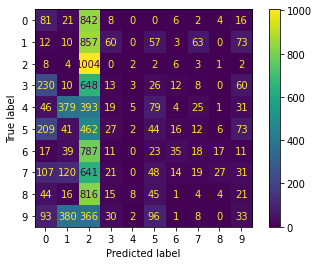

In [179]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()